In [1]:
from PIL import Image

# Open the images
cover_image = Image.open('cover-image.jpg')
secret_image = Image.open('secret-image.jpg')

# Get the size (dimensions) of the images
cover_size = cover_image.size
secret_size = secret_image.size

# Print the sizes
print("Cover Image Size:", cover_size)
print("Secret Image Size:", secret_size)


Cover Image Size: (1024, 1024)
Secret Image Size: (172, 148)


In [26]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pywt
import cv2

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = cv2.resize(secret_image, coeffs_cover[0].shape[:2][::-1])

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Define file paths
cover_image_path = r'C:\Users\srusti\Downloads\cover-image.jpg'
secret_image_path = r'C:\Users\srusti\Downloads\download (6).jpg'
stego_image_path = 'stego_image.png'

# Load cover image
cover_image = cv2.imread(cover_image_path)

# Load secret image
secret_image = cv2.imread(secret_image_path)

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Save stego image
cv2.imwrite(stego_image_path, stego_array)

# Display stego image
cv2.imshow('Stego Image', stego_array)
cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: Input array has fewer dimensions than the specified axes

In [4]:
import numpy as np
import pywt
from PIL import Image

# Function to convert image to numpy array
def image_to_array(image_path):
    return np.array(Image.open(image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    print("Cover Image Shape:", cover_image.shape)
    print("Secret Image Shape:", secret_image.shape)
    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Define file paths
cover_image_path = 'cover-image.jpg'
secret_image_path = 'secret-image.jpg'
stego_image_path = 'stego_image.png'

# Load cover image
cover_image = image_to_array(cover_image_path)

# Load secret image
secret_image = image_to_array(secret_image_path)

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Convert the stego array back to image and save it
stego_image = Image.fromarray(stego_array)
stego_image.save(stego_image_path)

# Display stego image
stego_image.show()


Cover Image Shape: (1024, 1024, 3)
Secret Image Shape: (148, 172, 3)


ValueError: operands could not be broadcast together with shapes (1024,512,2) (1024,512,3) (1024,512,2) 

In [5]:
import numpy as np
import pywt
from PIL import Image

# Function to convert image to numpy array
def image_to_array(image_path):
    return np.array(Image.open(image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Define file paths
cover_image_path = 'cover-image.jpg'
secret_image_path = 'secret-image.jpg'
stego_image_path = 'stego_image.png'

# Load cover image
cover_image = image_to_array(cover_image_path)

# Load secret image
secret_image = image_to_array(secret_image_path)

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Convert the stego array back to image and save it
stego_image = Image.fromarray(stego_array)
stego_image.save(stego_image_path)

# Display stego image
stego_image.show()


TypeError: Cannot handle this data type: (1, 1, 1), <f8

In [7]:
import numpy as np
import pywt
from PIL import Image

# Function to convert image to numpy array
def image_to_array(image_path):
    return np.array(Image.open(image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Define file paths
cover_image_path = 'cover-image.jpg'
secret_image_path = 'secret-image.jpg'
stego_image_path = 'stego_image.png'

# Load cover image
cover_image = image_to_array(cover_image_path)

# Load secret image
secret_image = image_to_array(secret_image_path)

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Convert the stego array back to image and save it
stego_image = Image.fromarray(stego_array)
stego_image.save(stego_image_path)

# Display stego image
stego_image.show()


ValueError: operands could not be broadcast together with shapes (1024,512,2) (1024,512) (1024,512,2) 

In [9]:
import numpy as np
import pywt
from PIL import Image

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Convert the stego array back to image and display it
stego_image = Image.fromarray(stego_array)
stego_image.show()



In [3]:
import numpy as np
import pywt
from PIL import Image

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Convert the stego array back to image
stego_image = Image.fromarray(stego_array)

# Convert stego image to RGB mode
stego_image = stego_image.convert('RGB')

# Save stego image to a file
stego_image_path = 'stego-image.jpg'
stego_image.save(stego_image_path)

# Display stego image
stego_image.show()


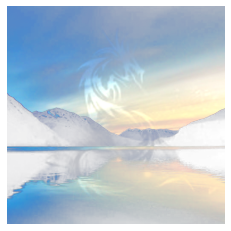

In [4]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


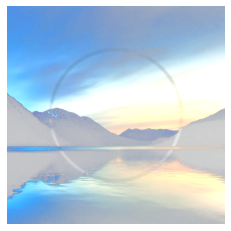

In [1]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secretimage.png'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.5):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


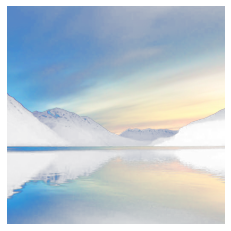

In [2]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


In [2]:
# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr


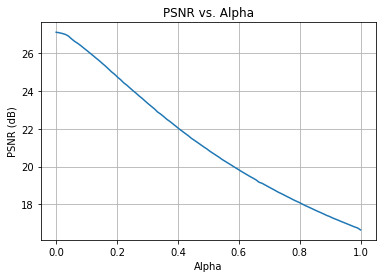

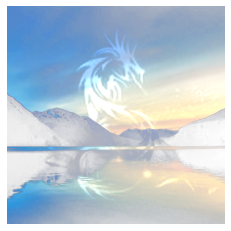

In [3]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
alphas = np.linspace(0, 1, 100)
psnr_values = []
for alpha in alphas:
    stego_array = embed_image(cover_image, secret_image, alpha)
    psnr = calculate_psnr(cover_image, stego_array)
    psnr_values.append(psnr)

# Plot PSNR graph
plt.plot(alphas, psnr_values)
plt.xlabel('Alpha')
plt.ylabel('PSNR (dB)')
plt.title('PSNR vs. Alpha')
plt.grid(True)
plt.show()

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()



PSNR: 27.094744518729435


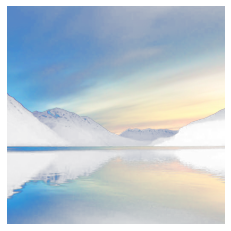

In [4]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Calculate PSNR
psnr = calculate_psnr(cover_image, stego_array)
print("PSNR:", psnr)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


Best PSNR: 27.0947370199405
Best Alpha: 0.01


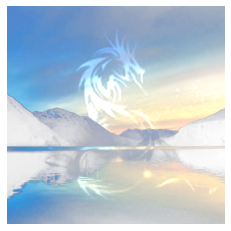

In [5]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.1):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'bior1.3')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'bior1.3')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
best_alpha = None
best_psnr = -float('inf')

# Experiment with different values of alpha
for alpha in np.linspace(0.01, 1, 100):
    stego_array = embed_image(cover_image, secret_image, alpha)
    psnr = calculate_psnr(cover_image, stego_array)
    
    # Keep track of the best PSNR value and corresponding alpha
    if psnr > best_psnr:
        best_psnr = psnr
        best_alpha = alpha

print("Best PSNR:", best_psnr)
print("Best Alpha:", best_alpha)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


In [7]:
import os

# File paths
secret_image_path = 'secret-image.jpg'
cover_image_path = 'cover-image.jpg'

# Function to get the file size
def get_file_size(file_path):
    if os.path.exists(file_path):
        return os.path.getsize(file_path)
    else:
        return None

# Get sizes
secret_image_size = get_file_size(secret_image_path)
cover_image_size = get_file_size(cover_image_path)

# Print sizes
if secret_image_size is not None:
    print(f"The size of secret-image.jpg is: {secret_image_size} bytes")
else:
    print("secret-image.jpg not found")

if cover_image_size is not None:
    print(f"The size of cover-image.jpg is: {cover_image_size} bytes")
else:
    print("cover-image.jpg not found")


The size of secret-image.jpg is: 4505 bytes
The size of cover-image.jpg is: 64805 bytes


In [8]:
from PIL import Image

# Open the image
secret_image_path = 'secret-image.jpg'
secret_image = Image.open(secret_image_path)

# Get the dimensions (width and height) of the image
width, height = secret_image.size

# Print the dimensions
print(f"The width of the secret image is: {width} pixels")
print(f"The height of the secret image is: {height} pixels")


The width of the secret image is: 172 pixels
The height of the secret image is: 148 pixels


PSNR: 26.73007127545457


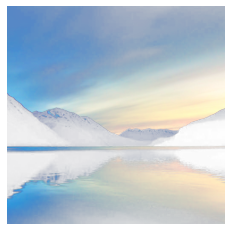

In [9]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secretimage.png'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Calculate PSNR
psnr = calculate_psnr(cover_image, stego_array)
print("PSNR:", psnr)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


PSNR: 27.05551175102017


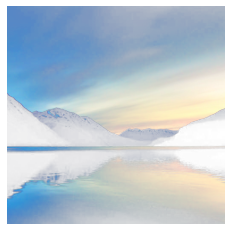

In [2]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret2-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Calculate PSNR
psnr = calculate_psnr(cover_image, stego_array)
print("PSNR:", psnr)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


PSNR: 27.092298423238674


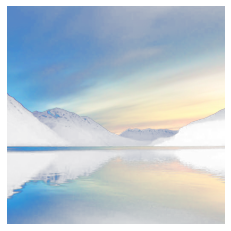

In [11]:
import numpy as np
import pywt
from PIL import Image
import matplotlib.pyplot as plt

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = np.array(Image.open(cover_image_path))

# Load secret image
secret_image_path = 'secret4-image.jpg'
secret_image = np.array(Image.open(secret_image_path))

# Function to hide secret image within cover image using DWT
def embed_image(cover_image, secret_image, alpha=0.01):
    # Convert secret image to grayscale if it has multiple channels
    if secret_image.shape[-1] > 1:
        secret_image = secret_image.mean(axis=-1, keepdims=True)

    # Convert data type of secret image to uint8
    secret_image = secret_image.astype(np.uint8)

    # Apply DWT to cover image
    coeffs_cover = pywt.dwt2(cover_image, 'haar')

    # Resize secret image to match LL subband dimensions
    secret_resized = np.array(Image.fromarray(secret_image.squeeze()).resize(coeffs_cover[0].shape[:2][::-1]))

    # Embed secret image into LL subband of cover image
    coeffs_cover = list(coeffs_cover)
    coeffs_cover[0] += alpha * secret_resized[..., np.newaxis]

    # Reconstruct stego image from DWT coefficients
    stego_array = pywt.idwt2(coeffs_cover, 'haar')

    # Clip pixel values to valid range
    stego_array = np.clip(stego_array, 0, 255).astype('uint8')

    return stego_array

# Calculate PSNR
def calculate_psnr(original, compressed):
    # Convert images to grayscale if they have multiple channels
    if original.ndim == 3:
        original = np.mean(original, axis=-1)
    if compressed.ndim == 3:
        compressed = np.mean(compressed, axis=-1)
    
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Embed secret image into cover image
stego_array = embed_image(cover_image, secret_image)

# Calculate PSNR
psnr = calculate_psnr(cover_image, stego_array)
print("PSNR:", psnr)

# Display stego image using matplotlib
plt.imshow(stego_array)
plt.axis('off')
plt.show()


In [1]:
from PIL import Image

# Open the image
secret_image_path = 'cover-image.jpg'
secret_image = Image.open(secret_image_path)

# Get the dimensions (width and height) of the image
width, height = secret_image.size

# Print the dimensions
print(f"The width of the secret image is: {width} pixels")
print(f"The height of the secret image is: {height} pixels")

The width of the secret image is: 1024 pixels
The height of the secret image is: 1024 pixels


In [2]:
from skimage.metrics import structural_similarity as ssim
from skimage import io

# Load cover imagecover_image_path = 'cover-image.jpg'
cover_image = io.imread(cover_image_path, as_gray=True)

# Load stego image
stego_image_path = 'stego-image.jpg'
stego_image = io.imread(stego_image_path, as_gray=True)

# Calculate Structural Similarity Index (SSI)
ssi = ssim(cover_image, stego_image)

print("Structural Similarity Index (SSI):", ssi)


Structural Similarity Index (SSI): 0.9424304522029953


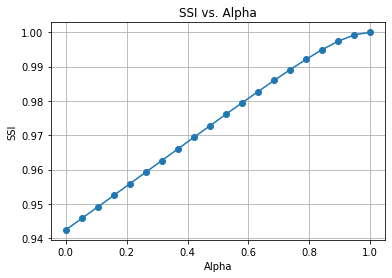

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage import io

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = io.imread(cover_image_path, as_gray=True)

# Load stego image
stego_image_path = 'stego-image.jpg'
stego_image = io.imread(stego_image_path, as_gray=True)

# Calculate Structural Similarity Index (SSI) for different alpha values
alphas = np.linspace(0, 1, num=20)  # Adjust num as needed for more or fewer alpha values
ssi_values = []

for alpha in alphas:
    # Blend cover and stego images using alpha
    blended_image = alpha * cover_image + (1 - alpha) * stego_image

    # Calculate SSI between blended image and cover image
    ssi = ssim(cover_image, blended_image)
    ssi_values.append(ssi)

# Plot SSI graph
plt.plot(alphas, ssi_values, marker='o')
plt.xlabel('Alpha')
plt.ylabel('SSI')
plt.title('SSI vs. Alpha')
plt.grid(True)
plt.show()


In [6]:
import numpy as np
from skimage.metrics import mean_squared_error
from skimage import io

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = io.imread(cover_image_path, as_gray=True)

# Load stego image
stego_image_path = 'stego-image.jpg'
stego_image = io.imread(stego_image_path, as_gray=True)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(cover_image, stego_image)

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.004302048110068936


Mean Squared Error (MSE): 0.004302048110068936


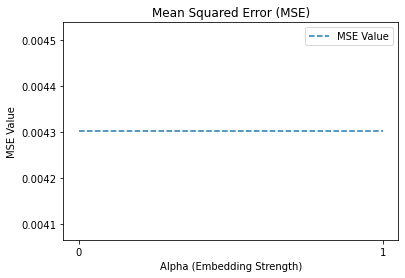

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error
from skimage import io

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = io.imread(cover_image_path, as_gray=True)

# Load stego image
stego_image_path = 'stego-image.jpg'
stego_image = io.imread(stego_image_path, as_gray=True)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(cover_image, stego_image)

print("Mean Squared Error (MSE):", mse)

# Plotting MSE graph
fig, ax = plt.subplots()
ax.plot([0, 1], [mse, mse], linestyle='--', label='MSE Value')
ax.legend()
ax.set_xlabel('Alpha (Embedding Strength)')
ax.set_ylabel('MSE Value')
ax.set_title('Mean Squared Error (MSE)')
plt.xticks([0, 1], [0, 1])  # Set the xticks to represent alpha values
plt.show()


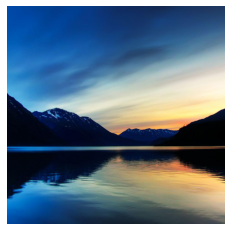

In [3]:
import matplotlib.pyplot as plt
from skimage import io

# Load cover image
cover_image_path = 'cover-image.jpg'
cover_image = io.imread(cover_image_path)

# Display cover image
plt.imshow(cover_image)
plt.axis('off')  # Optional: Turn off axis
plt.show()


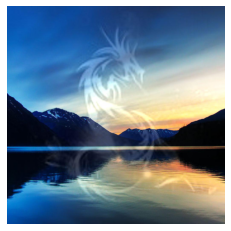

In [4]:
import matplotlib.pyplot as plt
from skimage import io

# Load stego image
stego_image_path = 'stego-image.jpg'
stego_image = io.imread(stego_image_path)

# Display stego image
plt.imshow(stego_image)
plt.axis('off')  # Optional: Turn off axis
plt.show()
